# Exploration des logs

Traitements de logs générés par un QCM.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Observations brutes

In [3]:
import os
names = [os.path.join("logs", _) for _ in os.listdir("logs")]
names = names[:1]
names

['logs\\QCMApp.log']

In [4]:
with open(names[0], 'r', encoding="utf-8") as f:
    lines = f.readlines()
lines[5:10]

['2018-12-12 17:56:29,989,INFO,[DATA],{"msg":"qcm","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"game":"simple_french_qcm","qn":"0"}\n',
 '2018-12-12 17:56:33,130,INFO,[DATA],{"msg":"event","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"events":["focus:true,game:simple_french_qcm,qn:0"]}\n',
 '2018-12-12 17:56:34,145,INFO,[DATA],{"msg":"event","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"events":["focus:true,game:simple_french_qcm,qn:0"]}\n',
 '2018-12-12 17:56:34,224,INFO,[DATA],{"msg":"event","session":{"alias":"xavierd"},"client":["167.220.196.38",52686],"events":["focus:true,game:simple_french_qcm,qn:0"]}\n',
 '2018-12-12 17:56:34,255,INFO,[DATA],{"msg":"answer","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"data":{"a0":"on","b":"ok","game":"simple_french_qcm","qn":"0","next":"1","events":"-a0,on"}}\n']

In [5]:
from mathenjeu.datalog import enumerate_qcmlog
obs = list(enumerate_qcmlog(names))
obs[:5]

[{'person_id': 'c241c15008614ea67480',
  'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 29, 989000),
  'qtime': 'begin'},
 {'person_id': 'c241c15008614ea67480',
  'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 34, 255000),
  'qtime': 'end',
  'simple_french_qcm-0-a0': 'on',
  'simple_french_qcm-0-b': 'ok',
  'game': 'simple_french_qcm',
  'qn': '0',
  'next': '1',
  'events': '-a0,on',
  'simple_french_qcm-0-nbvisit': 1.0,
  'simple_french_qcm-0-duration': datetime.timedelta(seconds=4, microseconds=266000)},
 {'person_id': '32606f02fa0df6aac111',
  'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 34, 302000),
  'qtime': 'begin'},
 {'person_id': '32606f02fa0df6aac111',
  'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 37, 645000),
  'qtime': 'end',
  'simple_french_qcm-1-a2': 'on',
  'simple_french_qcm-1-b': 'ok',
  'game': 'simple_french_qcm',
  'qn': '1',
  'next': '2',
  'events': '-a2,on',
  'si

In [6]:
import pandas
df = pandas.DataFrame(obs)
df.shape

(81, 58)

In [7]:
df.head().T

,0,1,2,3,4
-a1,NaN,NaN,NaN,NaN,NaN
alias,xavierd,xavierd,xavierd,xavierd,xavierd
events,NaN,"-a0,on",NaN,"-a2,on",NaN
game,NaN,simple_french_qcm,NaN,simple_french_qcm,NaN
next,NaN,1,NaN,2,NaN
on,NaN,NaN,NaN,NaN,NaN
on-a2,NaN,NaN,NaN,NaN,NaN
person_id,c241c15008614ea67480,c241c15008614ea67480,32606f02fa0df6aac111,32606f02fa0df6aac111,32606f02fa0df6aac111
qn,NaN,0,NaN,1,NaN
qtime,begin,end,begin,end,begin


In [8]:
set(df.alias)

{'Clemence', 'thierry-d', 'xavierd', 'xavierg'}

## Préparation des données

In [9]:
df2 = df[df.qtime == 'end'].copy()
df2.head().T

,1,3,5,7,9
-a1,NaN,NaN,NaN,NaN,NaN
alias,xavierd,xavierd,xavierd,xavierd,xavierd
events,"-a0,on","-a2,on","-a2,on","-a2,on-a2,on-a3,on-a2,on","-a2,on"
game,simple_french_qcm,simple_french_qcm,simple_french_qcm,simple_french_qcm,simple_french_qcm
next,1,2,3,4,5
on,NaN,NaN,NaN,NaN,NaN
on-a2,NaN,NaN,NaN,NaN,NaN
person_id,c241c15008614ea67480,32606f02fa0df6aac111,32606f02fa0df6aac111,32606f02fa0df6aac111,32606f02fa0df6aac111
qn,0,1,2,3,4
qtime,end,end,end,end,end


In [10]:
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-a' in c]
df_question = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-b' in c]
df_bouton = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-nb' in c]
df_visit = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-ANS' in c]
df_ans = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-dur' in c]
df_dur = df2[cols]

In [11]:
df_dur.head().T

,1,3,5,7,9
alias,xavierd,xavierd,xavierd,xavierd,xavierd
simple_french_qcm-0-duration,0 days 00:00:04.266000,NaT,NaT,NaT,NaT
simple_french_qcm-1-duration,NaT,0 days 00:00:03.343000,NaT,NaT,NaT
simple_french_qcm-2-duration,NaT,NaT,0 days 00:00:06.750000,NaT,NaT
simple_french_qcm-3-duration,NaT,NaT,NaT,1 days 00:00:00,NaT
simple_french_qcm-4-duration,NaT,NaT,NaT,NaT,0 days 00:00:09.688000
simple_french_qcm-5-duration,NaT,NaT,NaT,NaT,NaT
simple_french_qcm-6-duration,NaT,NaT,NaT,NaT,NaT
simple_french_qcm-7-duration,NaT,NaT,NaT,NaT,NaT
simple_french_qcm-8-duration,NaT,NaT,NaT,NaT,NaT


In [12]:
import numpy 

def aggnotnan_serie(values):
    res = []
    for v in values:
        if isinstance(v, float) and numpy.isnan(v):
            continue
        if pandas.isnull(v):
            continue
        if v in ('ok', 'on'):
            v = 1
        elif v == 'skip':
            v = 1000
        res.append(v)
    if len(res) > 0:        
        if isinstance(res[0], str):
            r = ",".join(str(_) for _ in res)
        else:
            if len(res) == 1:
                r = res[0]
            else:
                try:
                    r = sum(res)
                except:
                    r = 0
    else:
        r = numpy.nan
    return r


def aggnotnan(values):
    if isinstance(values, pandas.core.series.Series):
        r = aggnotnan_serie(values)
        return r
    else:
        res = []
        for col in values.columns:
            val = list(values[col])
            res.append(aggnotnan_serie(val))
        df = pandas.DataFrame(res, columns)
        return df
    
gr_ans = df_ans.groupby("alias").agg(aggnotnan)
gr_ans

,simple_french_qcm-8-ANS
alias,
Clemence,Prout
thierry-d,Astérix et Cléopâtre
xavierd,thalès
xavierg,


In [13]:
gr_dur = df_dur.groupby("alias").agg(aggnotnan)
gr_dur

,simple_french_qcm-0-duration,simple_french_qcm-1-duration,simple_french_qcm-2-duration,simple_french_qcm-3-duration,simple_french_qcm-4-duration,simple_french_qcm-5-duration,simple_french_qcm-6-duration,simple_french_qcm-7-duration,simple_french_qcm-8-duration
alias,,,,,,,,,
Clemence,00:00:16.530000,0 days 00:00:14.010000,00:00:28.765000,0 days 00:00:19.492000,0 days 00:03:19.593000,0 days 00:00:11.740000,0 days 00:00:21.868000,00:00:20.923000,00:00:14.483000
thierry-d,00:00:06.904000,0,00:00:31.978000,0 days 00:00:19.246000,0 days 00:00:21.230000,0 days 00:00:10.153000,0 days 00:00:20.314000,00:00:17.141000,00:03:02.506000
xavierd,00:00:04.266000,0 days 00:00:03.343000,00:00:06.750000,1 days 00:00:00,0 days 00:00:09.688000,1 days 00:00:00,1 days 00:00:00,00:00:06.390000,00:00:04.390000
xavierg,00:00:02.920000,NaN,NaT,0 days 00:00:09.323000,0,0 days 00:00:02.247000,0 days 00:00:00.750000,00:00:01.188000,00:00:01.422000


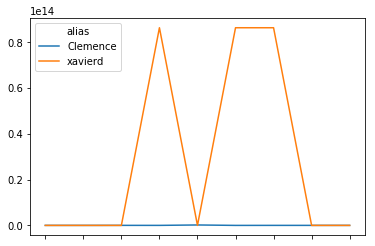

In [14]:
gr_dur.T.plot();

In [15]:
gr_question = df_question.groupby("alias").agg(aggnotnan)
gr_question.T

alias,Clemence,thierry-d,xavierd,xavierg
simple_french_qcm-0-a0,1.0,1.0,1.0,NaN
simple_french_qcm-0-a1,NaN,NaN,NaN,1.0
simple_french_qcm-1-a1,1.0,NaN,NaN,NaN
simple_french_qcm-1-a2,NaN,2.0,1.0,NaN
simple_french_qcm-2-a2,1.0,1.0,1.0,NaN
simple_french_qcm-3-a0,1.0,1.0,NaN,NaN
simple_french_qcm-3-a2,NaN,NaN,1.0,1.0
simple_french_qcm-3-a3,NaN,NaN,1.0,1.0
simple_french_qcm-4-a0,1.0,NaN,NaN,NaN
simple_french_qcm-4-a2,NaN,1.0,1.0,1.0


In [16]:
gr_bouton = df_bouton.groupby("alias").agg(aggnotnan)
gr_bouton.T

alias,Clemence,thierry-d,xavierd,xavierg
simple_french_qcm-0-b,1.0,1.0,1.0,1.0
simple_french_qcm-1-b,1.0,1001.0,1.0,NaN
simple_french_qcm-2-b,1.0,1.0,1.0,NaN
simple_french_qcm-3-b,1.0,1.0,1.0,1000.0
simple_french_qcm-4-b,1.0,1.0,1.0,2.0
simple_french_qcm-5-b,1.0,1.0,1.0,1000.0
simple_french_qcm-6-b,1.0,1.0,1.0,1.0
simple_french_qcm-7-b,1.0,1.0,1.0,1.0
simple_french_qcm-8-b,1.0,1.0,1.0,1.0


In [17]:
gr_visit = df_visit.groupby("alias").agg(aggnotnan)
gr_visit.T

alias,Clemence,thierry-d,xavierd,xavierg
simple_french_qcm-0-nbvisit,1.0,1.0,1.0,1.0
simple_french_qcm-1-nbvisit,1.0,3.0,1.0,NaN
simple_french_qcm-2-nbvisit,1.0,2.0,1.0,NaN
simple_french_qcm-3-nbvisit,1.0,1.0,0.5,3.0
simple_french_qcm-4-nbvisit,1.0,1.0,1.0,5.0
simple_french_qcm-5-nbvisit,1.0,1.0,0.5,2.0
simple_french_qcm-6-nbvisit,1.0,1.0,0.5,1.0
simple_french_qcm-7-nbvisit,1.0,1.0,1.0,1.0
simple_french_qcm-8-nbvisit,1.0,1.0,1.0,1.0


## Histogrammes

In [18]:
nonan_question = gr_question.fillna(0)

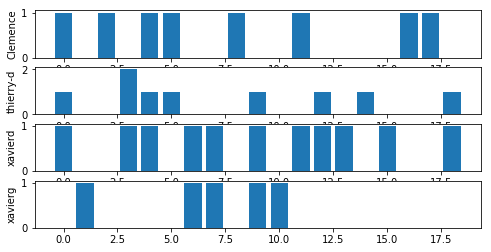

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nonan_question.shape[0], 1, 
                       figsize=(8, nonan_question.shape[0]))
for i in range(0, nonan_question.shape[0]):
    ax[i].set_ylabel(nonan_question.index[i])
    ax[i].bar(list(range(nonan_question.shape[1])), 
              nonan_question.iloc[i,:])

## Clustering

In [20]:
nonan_question = gr_question.fillna(0)

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)

In [22]:
km.fit(nonan_question)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
pred = km.predict(nonan_question)
pred

array([0, 1, 1, 0])

In [24]:
solution = pandas.DataFrame(data=pred, columns=["cluster"], index=nonan_question.index)

In [25]:
solution

,cluster
alias,
Clemence,0
thierry-d,1
xavierd,1
xavierg,0


## ACP

In [26]:
from sklearn.decomposition import PCA
acp = PCA(n_components=2)
acp.fit(nonan_question)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
coord = acp.transform(nonan_question)
data = pandas.DataFrame(data=coord, columns=['X1', 'X2'], index=nonan_question.index)
data["cluster"] = solution
data

,X1,X2,cluster
alias,,,
Clemence,1.745710,-1.484954,0
thierry-d,-1.574330,-0.883546,1
xavierd,-1.057572,0.461806,1
xavierg,0.886193,1.906695,0


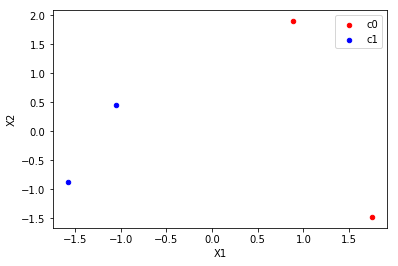

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
colors = ['red', 'blue', 'orange', 'green']
for i in range(0, 2):
    data[data.cluster==i].plot(x="X1", y="X2", 
                               kind="scatter", 
                               ax=ax, label="c%d" % i, 
                               color=colors[i])

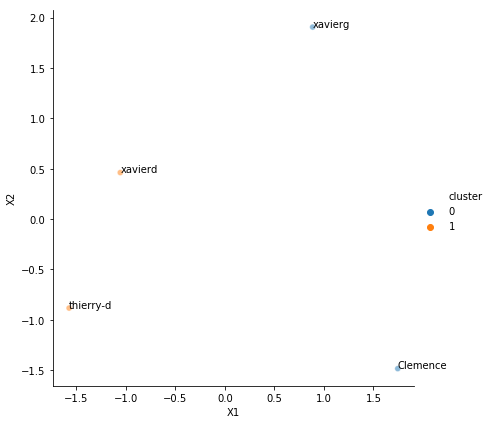

In [29]:
import seaborn
data["weight"] = 10
# Plot miles per gallon against horsepower with other semantics
ax = seaborn.relplot(x="X1", y="X2", hue="cluster",
            sizes=(40, 400), alpha=.5, 
            height=6, data=data)
ind = list(data.index)
for i in range(0, data.shape[0]):
    ax.ax.text(data.iloc[i, 0], data.iloc[i, 1], ind[i])

## Prediction


In [30]:
nonan_question.T

alias,Clemence,thierry-d,xavierd,xavierg
simple_french_qcm-0-a0,1.0,1.0,1.0,0.0
simple_french_qcm-0-a1,0.0,0.0,0.0,1.0
simple_french_qcm-1-a1,1.0,0.0,0.0,0.0
simple_french_qcm-1-a2,0.0,2.0,1.0,0.0
simple_french_qcm-2-a2,1.0,1.0,1.0,0.0
simple_french_qcm-3-a0,1.0,1.0,0.0,0.0
simple_french_qcm-3-a2,0.0,0.0,1.0,1.0
simple_french_qcm-3-a3,0.0,0.0,1.0,1.0
simple_french_qcm-4-a0,1.0,0.0,0.0,0.0
simple_french_qcm-4-a2,0.0,1.0,1.0,1.0


In [31]:
xcols = nonan_question.columns[:15]
ycol = nonan_question.columns[16]
ycol, set(nonan_question[ycol])

('simple_french_qcm-6-a5', {0.0, 1.0})

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nonan_question[xcols], nonan_question[ycol], test_size=0.5)

In [33]:
from sklearn.ensemble import RandomForestClassifier
clr = RandomForestClassifier()
clr.fit(X_train, y_train)

c:\python370_x64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clr.predict(X_test))

array([[1, 0],
       [1, 0]], dtype=int64)